In [31]:
import numpy as np
import pandas as pd
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from textblob import Word
from textblob import TextBlob
import seaborn as sns
import plotly.express as px
import re
from textblob import Word

from plotly.offline import download_plotlyjs, init_notebook_mode,  iplot
init_notebook_mode(connected=True)


In [32]:
spotify=pd.read_csv("Dataset/reviews.csv",usecols=["Review","Rating"]) # Reading the dataset and using only the review and rating columns
data=spotify.copy()
data.head()

,Review,Rating
0,"Great music service, the audio is high quality...",5
1,Please ignore previous negative rating. This a...,5
2,"This pop-up ""Get the best Spotify experience o...",4
3,Really buggy and terrible to use as of recently,1
4,Dear Spotify why do I get songs that I didn't ...,1


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61594 entries, 0 to 61593
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  61594 non-null  object
 1   Rating  61594 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 962.5+ KB


pre

In [34]:

data["Review"]=data["Review"].apply(lambda x: re.sub('[^a-z A-Z 0-9-]+', '', x)) #removing special characters
data["Review"]=data["Review"].apply(lambda x: " ".join(x.lower() for x in x.split())) #lowering the text
data["Review"]=data["Review"].apply(lambda x: " ".join(x.split())) #removing extra spaces
data["Review"]=data["Review"].apply(lambda x: re.sub('\d+', '', x)) #removing numbers
data["Review"]=data["Review"].apply(lambda x: re.sub(r'(http|https|ftp|ssh)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', '' , str(x))) #removing links
sw=stopwords.words("english")
data["Review"]=data["Review"].apply(lambda x: " ".join(x for x in x.split() if x not in sw)) #removing stopwords

data["Review"]=data["Review"].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()])) #lemmatization
data.head(15)

,Review,Rating
0,great music service audio high quality app eas...,5
1,please ignore previous negative rating app sup...,5
2,pop-up get best spotify experience android ann...,4
3,really buggy terrible use recently,1
4,dear spotify get song didnt put playlist shuff...,1
5,player control sometimes disappear reason app ...,3
6,love selection lyric provided song youre liste...,5
7,still extremely slow changing storage external...,3
8,great app best mp music app ever used one prob...,5
9,im deleting app following reason app failing b...,1


eda

In [35]:
fig=px.histogram(data,x="Rating",color="Rating",title="Rating Distribution",width=800,height=500)
iplot(fig)

In [36]:
data.isnull().sum()

Review    0
Rating    0
dtype: int64

In [37]:
data["Rating"].replace(1, value="neg",inplace=True)
data["Rating"].replace(2, value="neg",inplace=True)
data["Rating"].replace(3, value="neutral",inplace=True)
data["Rating"].replace(4, value="pos",inplace=True)
data["Rating"].replace(5, value="pos",inplace=True)
data.head()

,Review,Rating
0,great music service audio high quality app eas...,pos
1,please ignore previous negative rating app sup...,pos
2,pop-up get best spotify experience android ann...,pos
3,really buggy terrible use recently,neg
4,dear spotify get song didnt put playlist shuff...,neg


In [38]:
data["Rating"].value_counts()

pos        29937
neg        24771
neutral     6886
Name: Rating, dtype: int64

In [39]:
fig1=px.histogram(data,x="Rating",color="Rating",title="Rating Distribution",width=800,height=500)
iplot(fig1)

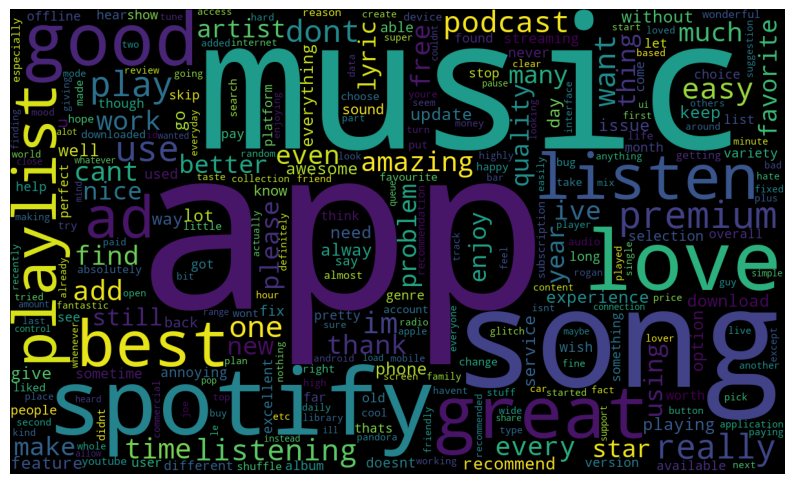

In [40]:
good = data[data['Rating'] == 'pos']['Review']

plt.figure(figsize=(10,10))
wc = WordCloud(max_words=2000, min_font_size=11, height=720, width=1200, collocations=False).generate(' '.join(good))
plt.axis('off')
plt.imshow(wc)

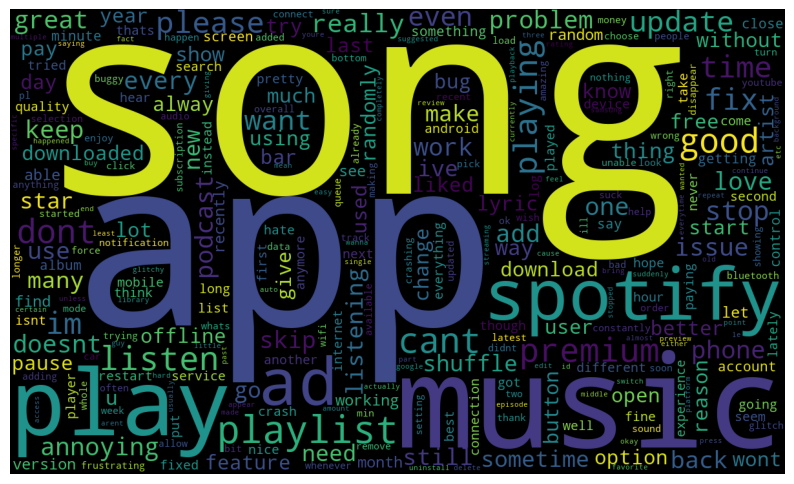

In [41]:
good = data[data['Rating'] == 'neutral']['Review']

plt.figure(figsize=(10,10))
wc = WordCloud(max_words=2000, min_font_size=11, height=720, width=1200, collocations=False).generate(' '.join(good))
plt.axis('off')
plt.imshow(wc)

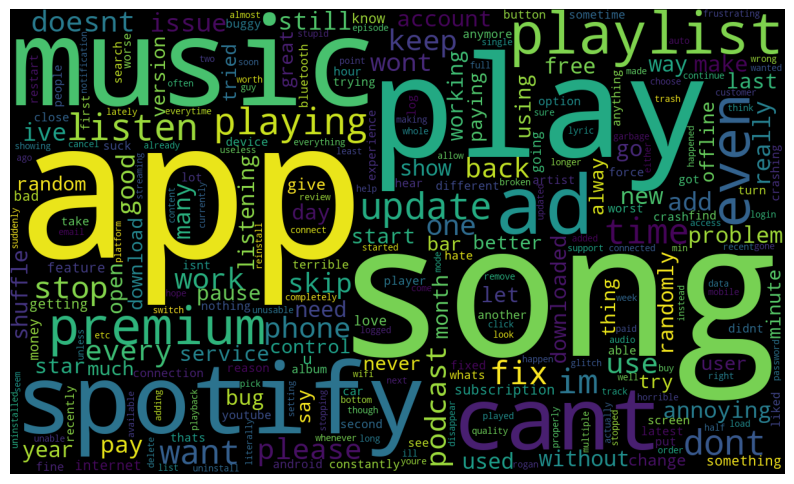

In [42]:
good = data[data['Rating'] == 'neg']['Review']

plt.figure(figsize=(10,10))
wc = WordCloud(max_words=2000, min_font_size=11, height=720, width=1200, collocations=False).generate(' '.join(good))
plt.axis('off')
plt.imshow(wc)